# The Wigner function

The Wigner function, denoted here as $W(q,p)$, is a quasiprobability distribution or function of the quadrature operators $q$ and $p$, position and momentum respectively, of the quantum harmonic oscillator. 
For a quantum state with density matrix $\rho$ the Wigner function is defined as {cite:p}`gerry2023introductory`

$$
W(q,p) = \frac{1}{2\pi\hbar}\int^{\infty}_{-\infty} e^{ipx/\hbar} \left\langle q+\frac{x}{2} \right\vert \rho  \left\vert q-\frac{x}{2} \right\rangle dx.
$$

With our convention that $\hbar=1$ this reduces to 


$$
W(q,p) = \frac{1}{2\pi}\int^{\infty}_{-\infty} e^{ipx} \left\langle q+\frac{x}{2} \right\vert \rho  \left\vert q-\frac{x}{2} \right\rangle dx.
$$

This expression looks a bit daunting. For instance I was confused at first about how to compute the vector-matrix-vector product $\left\langle q+\frac{x}{2} \right\vert \rho  \left\vert q-\frac{x}{2} \right\rangle$. 

It would be helpful to actually compute this integral for a particular quantum state. 
Let's pick the Fock state $\rho = \ket{1}\bra{1}$ and see if we can do the derivation.
First let's begin by recognizing that the $\left\langle q+\frac{x}{2} \right\vert$ and $\left\vert q-\frac{x}{2} \right\rangle$ are the eigenstates of the $q$ quadrature (position operator). 

Firstly if we assume that our state is a pure state $\rho = \ket{\psi}\bra{\psi}$ our Wigner function can be written as 

$$
W(q,p) = \frac{1}{2\pi}\int^{\infty}_{-\infty} e^{ipx} \left\langle q+\frac{x}{2} \bigg| \psi \right\rangle  \left\langle \psi \bigg| q-\frac{x}{2} \right\rangle dx.
$$

We now have these inner products between eigenstates of the position operator and our quantum state ket $\ket{\psi}$. In a first course on quantum mechanics {cite:p}`townsend2000modern` we learned that such an inner product is given by 

$$
\left\langle q+\frac{x}{2} \bigg| \psi \right\rangle \equiv \psi\left(q+\frac{x}{2}\right)
$$

where $\psi\left(q+\frac{x}{2}\right)$ is the ***wave function*** of the ket state $\ket{\psi}$. Naturally the other inner product is given by 

$$
\left\langle \psi \bigg| q-\frac{x}{2} \right\rangle \equiv \psi^*\left(q-\frac{x}{2}\right)
$$

where $*$ denotes the complex conjugate. So now we just need the analytic expression for the wave function of the Fock state. 
Since the Fock states are the energy states of the harmonic oscillator their wave function is derived as

$$
\psi(x) = 
$$

The Wigner function is now given by

$$
W(q,p) = \frac{1}{2\pi}\int^{\infty}_{-\infty} e^{ipx} \psi\left(q+\frac{x}{2}\right)  \psi^*\left(q-\frac{x}{2}\right) dx.
$$

So we've gotten rid of the vector-matrix-vector multiplcation in the integrand and now only have products of (complex) scalar functions.


## Computing and plotting the Wigner function

In [1]:
import qutip as qt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# ensure you install latex via: 
# sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
font = {'family': 'normal', 'weight': 'bold', 'size': 15}
mpl.rc('font', **font)

## Our derivation: Wigner function of $\ket{\psi}=\ket{1}$

Here we will use the analytic expression we derived above for the Wigner function of the Fock state and we'll use Matplotlib to plot it as a 2D contour plot.

In [ ]:
d = 40

## QuTiP: Wigner function of $\ket{\psi}=\ket{1}$

Let's use QuTiP's function `wigner` to compute the Wigner function to verify our results.

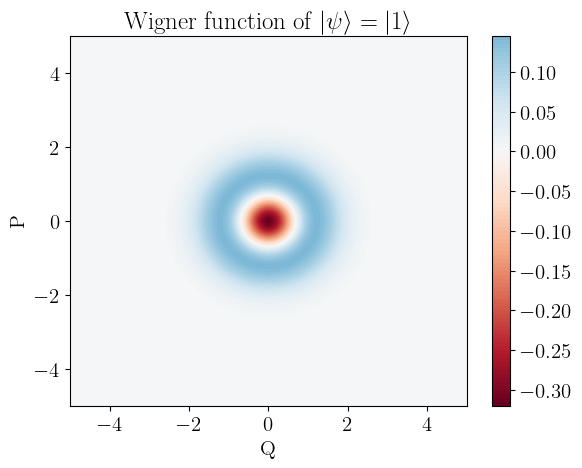

In [6]:
d = 40
max_quad = 5
psi = qt.fock_dm(d, 1)
points = 400
x_points = y_points = np.linspace(-max_quad, max_quad, points)
W = qt.wigner(psi, x_points, y_points)
X, Y = np.meshgrid(x_points, y_points)
plt.contourf(X, Y, W, levels=100, cmap=mpl.colormaps['RdBu'], vmin=-1/np.pi, vmax=1/np.pi)
plt.xlabel('Q')
plt.ylabel('P')
plt.title(r'Wigner function of $|\psi\rangle=|1\rangle$')
plt.colorbar()
plt.show()

## Properties of the Wigner function

The Wigner function has many interesting properties {cite:p}`leonhardt1997measuring`. For example it is real so $W(q,p) = W^*(q,p)$. Secondly it is normalized such that 

$$
\int^{\infty}_{-\infty}\int^{\infty}_{-\infty}W(q,p)dpdq = 1. 
$$

The Wigner function seems like it could be interpreted as a probability distribution. This is not true in general however since the Wigner function can take on negative values as we saw in the plot for the Wigner function of the Fock state $\ket{1}$. However the *marginals* of the Wigner function give the probability distribution of the state over the values of the quadratures. That is 

$$
\int^{\infty}_{-\infty}W(q,p)dp = |\psi(q)|^2
$$

and 

$$
\int^{\infty}_{-\infty}W(q,p)dq = |\phi(p)|^2.
$$

In [3]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Sat Jun 29 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

numpy     : 1.26.2
qutip     : 4.7.5
matplotlib: 3.7.4

